In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [2]:
# --- Offers Dataset
# TODO: change the offers dataset to one different from Turing Careers
with sqlite3.connect('./datasets/offers_dataset.db') as offers_conn:
    offers_frame = pd.read_sql('SELECT * FROM Offers', offers_conn, index_col='ID')

offers_frame

,Name,Description,Language,LocationType,Location
ID,,,,,
1,Software Developer,Miniclip is a global leader in digital games w...,Italian,On-Site,"Genova, Liguria"
2,Junior Software Developer,"NETtoWORK, azienda italiana nata nel 2016, ope...",Italian,On-Site,17100 Savona
3,Software Developer,We are looking for talented and passionate peo...,Italian,On-Site,55100 Lucca
4,Software Developer,ARESYS is a R&D oriented company with nearly ...,Italian,On-Site,"Matera, Basilicata"
5,Senior Software Developer,Il/la Candidato/a dovrà padroneggiare: \n \n- ...,Italian,On-Site,"Catania, Sicilia"
...,...,...,...,...,...
850,JUNIOR DEVELOPER,Sede lavoro: Bergamo | Tempo pieno \n Livello:...,Italian,On-Site,"Bergamo, Lombardia"
851,Sviluppatore Java Junior,TRIA ricerca uno sviluppatore Java JuniorNeola...,Italian,Remote,None
852,Stage Software Developer,CHI SIAMO \n Golilla è la start up delle azi...,Italian,On-Site,20089 Rozzano


In [3]:
# --- Skills Dataset
with sqlite3.connect('./datasets/skills_dataset.db') as skills_conn:
    skills_frame = pd.read_sql('SELECT * FROM Skills', skills_conn, index_col='ID')
    
skills_frame

,SKILL,TYPE
ID,,
0,JavaScript,Programming Language
1,HTML,Programming Language
2,Python,Programming Language
3,SQL,Programming Language
4,TypeScript,Programming Language
...,...,...
95,APT,Tool
96,Unity 3D,Tool
97,Pacman,Tool


## Offers skill extraction

In [4]:
from utils import print_performance


@print_performance
def extract_skills(offers_df, skills_df):
    skill_list = [skill.lower() for skill in skills_df['SKILL'].tolist()]
    skill_vectors = []
    for skill in skill_list:
        presence_vector = offers_df.Description.map(lambda desc: skill in desc.lower()).rename(skill)
        skill_vectors.append(presence_vector)
    return pd.concat([vec for vec in skill_vectors], axis=1)   

In [5]:
skill_vector = extract_skills(offers_frame, skills_frame)
skill_vector

Done in 2.07


,javascript,html,python,sql,typescript,bash/shell,java,c#,c++,c,...,msbuild,ansible,chocolatey,composer,llvm's clang,apt,unity 3d,pacman,pnpm,css
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5,True,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,True,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
851,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
852,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Distribution Analysis
Given that the dataset is imbalanced more data/better data should be acquired

In [6]:
# --- Unbalanced Data
skills_headers = skill_vector.columns.tolist()
skills_headers.remove('c')
skills_headers.remove('go')
skill_vector = skill_vector[skills_headers]

In [25]:
skill_counts = skill_vector.sum()
skill_counts.rename("Count", inplace=True)

javascript              215
html                    123
python                  159
sql                     270
typescript               57
java                    511
c#                      274
c++                     129
php                      83
rust                     18
kotlin                    8
ruby                     16
lua                      45
dart                     56
postgresql                9
mysql                    64
mongodb                   7
microsoft sql server     40
redis                    69
oracle                   98
google cloud             23
node.js                   9
react                   131
jquery                   45
express                   8
angular                 129
vue.js                   27
asp.net                  27
spring boot              54
django                    9
angularjs                22
.net                    221
spring framework          7
flutter                  31
react native             27
electron            

In [22]:
def plot_skills(count_frame):
    plt.figure(figsize=(10, 22))
    sns.barplot(x=count_frame.values, y=count_frame.index, palette="viridis")
    plt.title("Distribution of Skills in the Dataset")
    plt.xlabel("Count")
    plt.ylabel("Skills")
    plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_36544\1933005626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_frame.values, y=count_frame.index, palette="viridis")


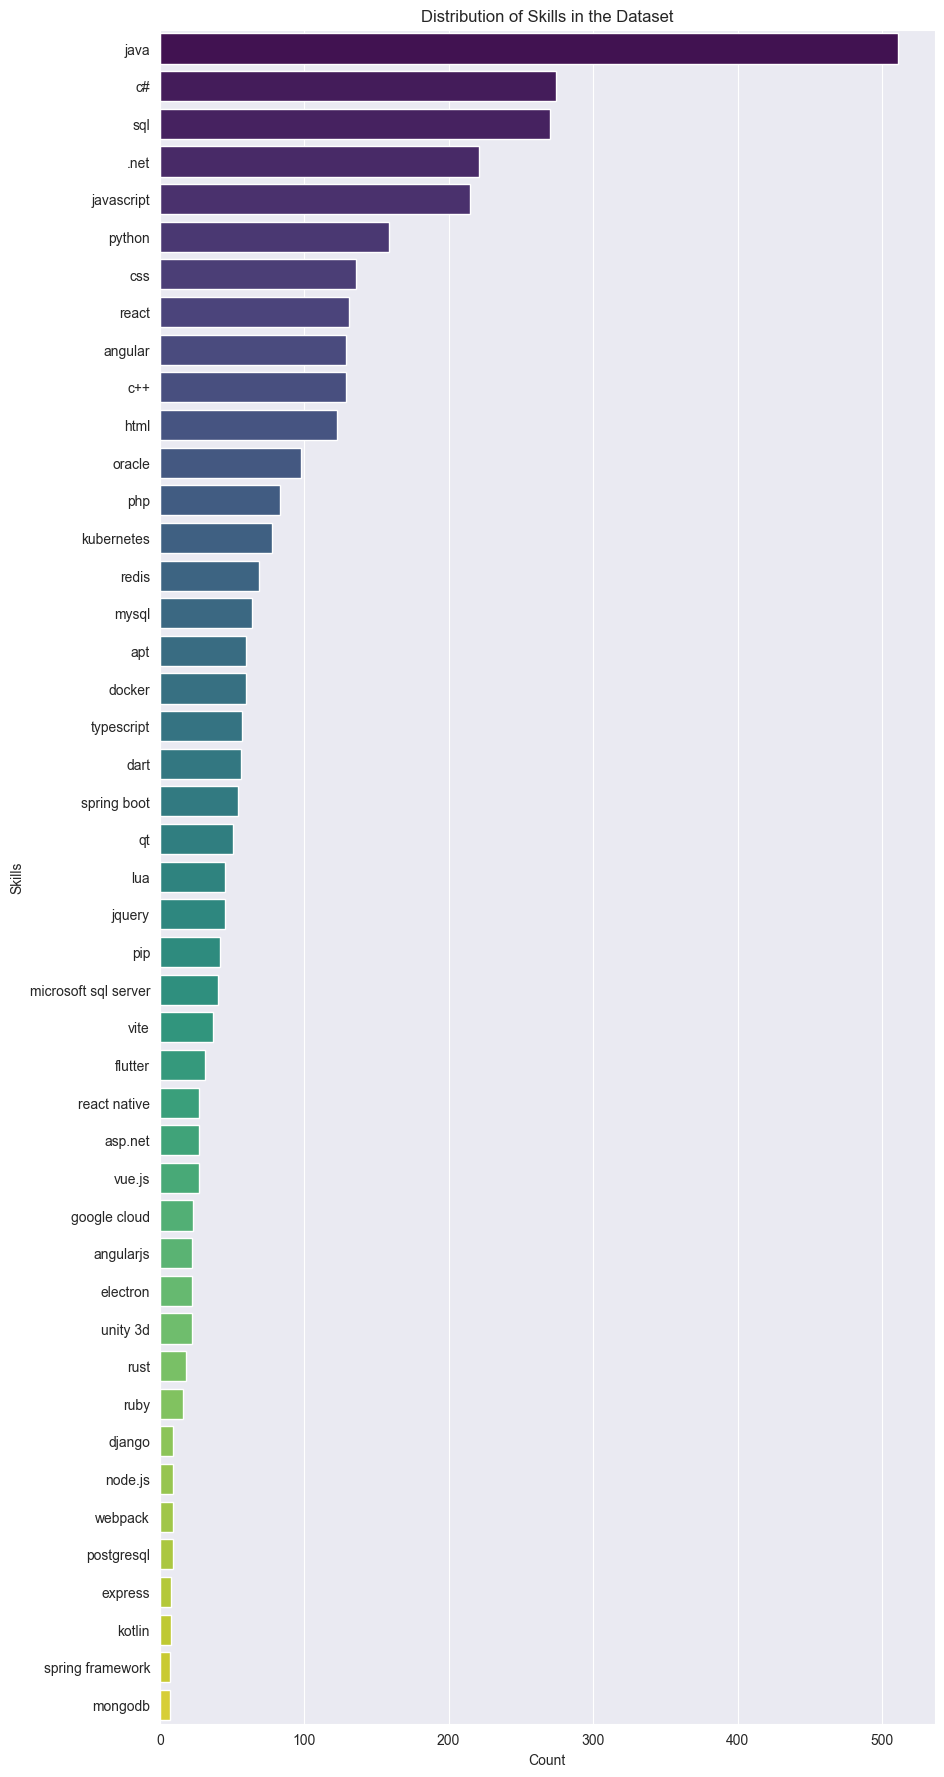

In [23]:
selected_skills = skill_counts[skill_counts >= 6].index
skill_vector = skill_vector[selected_skills]
skill_counts = skill_vector.sum()

plot_skills(skill_counts.sort_values(ascending=False))

## Association Rule Mining

### FP max Algorithm
One red-flag is that it doesn't show a single item set with HTML and CSS together.

In [34]:
from mlxtend.frequent_patterns import fpmax

@print_performance
def task_fp_max(vect):
    return fpmax(vect, use_colnames=True, min_support=0.111)

In [35]:
skill_sets = task_fp_max(skill_vector)
skill_sets

Done in 0.01


,support,itemsets
0,0.114754,"(angular, oracle, java)"
1,0.139344,"(html, javascript, java, css)"
2,0.151054,(c++)
3,0.126464,"(react, java)"
4,0.160422,"(java, python)"
5,0.124122,"(sql, javascript, java)"
6,0.132319,"(c#, sql, .net)"
7,0.186183,"(c#, java)"


## Clustering Algorithm

## Export

In [12]:
with sqlite3.connect('./datasets/skill_sets.db') as out_conn:
    out_curs = out_conn.cursor()
    out_curs.execute('''
        CREATE TABLE IF NOT EXISTS SkillSets (
            ID INTEGER PRIMARY KEY,
            SKILLS TEXT
        )    
    ''')

    i = -1
    for skill_set in skill_sets['itemsets'].tolist():
        if len(skill_set) > 1: 
            skill_list = []
            
            for skill in skill_set:
                skill_list.append(skill)
                
            i += 1
            out_curs.execute('''INSERT INTO SkillSets VALUES (?, ?)''', (i, ', '.join(skill_list)))
            
    out_conn.commit()


IntegrityError: UNIQUE constraint failed: SkillSets.ID

In [ ]:
with sqlite3.connect('./datasets/skill_sets.db') as test_conn:
        test_frame = pd.read_sql('SELECT * FROM SkillSets', test_conn, index_col='ID')

test_frame